## LAB : Clustering Algorithms

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

%matplotlib inline

Nous allons maintenant passer en revue trois algorithmes de clustering, en les discutant d’abord de manière générale, puis en montrant comment les implémenter avec les bibliothèques Python.   
Chargeons et évaluons d’abord nos données afin que des dimensions particulières ne dominent pas naturellement dans leurs contributions aux calculs lointains :

In [3]:
import os
os.getcwd()

'/home/mar1shell/Github/ENSAMC-CS-AI/Semester-3/Data-Science/workshops/Workshop-5'

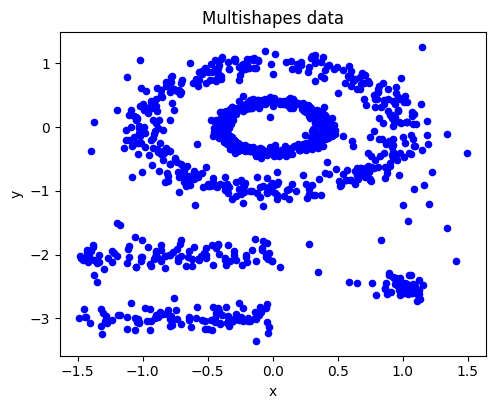

,x,y
0,-0.803739,-0.853053
1,0.852851,0.367618
2,0.927180,-0.274902
3,-0.752626,-0.511565
4,0.706846,0.810679


In [4]:
multishapes = pd.read_csv("../datasets/multishapes.csv")# loads x,y columns of a dataset
ms_df = multishapes[['x','y']]
ms_df.plot.scatter(x='x',y='y',c='Blue',\
                            title="Multishapes data",\
                            figsize=(5.5,4.2))
plt.show()
ms_df.head()

In [5]:
# displays our summary statistics of our data
ms_df.describe()

,x,y
count,1100.000000,1100.000000
mean,-0.081222,-0.625431
std,0.644967,1.176170
min,-1.489180,-3.353462
25%,-0.478839,-1.126752
50%,-0.132920,-0.297040
75%,0.366072,0.250817
max,1.492208,1.253874


In [6]:
# Standardisons les variables afin que des dimensions particulières ne dominent pas naturellement 
#dans leurs contributions aux calculs
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler = scaler.fit(ms_df)
print("Les moyennes  de 'x' et 'y' sont: ", scaler.mean_)
print("Les variances de 'x' et 'y' sont: ", scaler.var_) 

scaled_df = scaler.transform(ms_df)

scaled_df = pd.DataFrame(scaled_df, index=multishapes['shape'], columns = ms_df.columns)
scaled_df.describe()

Les moyennes  de 'x' et 'y' sont:  [-0.08122171 -0.6254313 ]
Les variances de 'x' et 'y' sont:  [0.4156046  1.38211934]


,x,y
count,1.100000e+03,1100.000000
mean,4.521636e-17,0.000000
std,1.000455e+00,1.000455
min,-2.183985e+00,-2.320473
25%,-6.167723e-01,-0.426425
50%,-8.019252e-02,0.279331
75%,6.938298e-01,0.745340
max,2.440659e+00,1.598544


Traçons ces données avec et sans standardisation

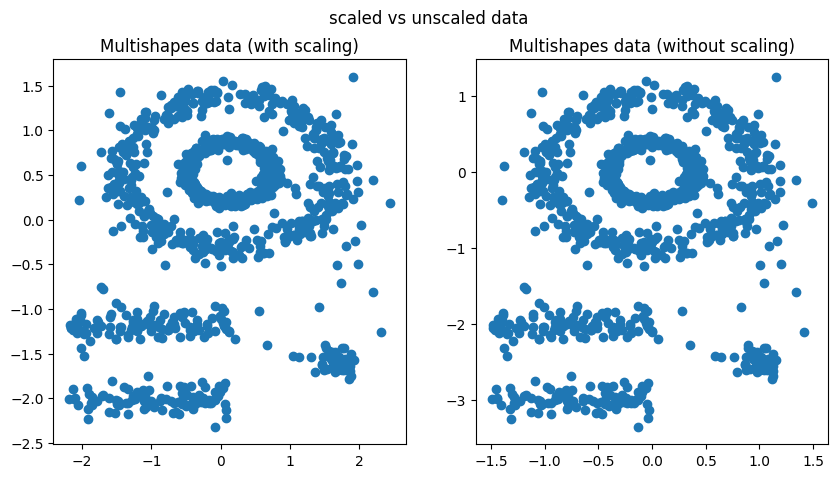

In [7]:
#scaled vs unscaled data')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('scaled vs unscaled data')

ax1.scatter(scaled_df[['x']], scaled_df[['y']])
ax1.set_title("Multishapes data (with scaling)")

ax2.scatter(ms_df[['x']], ms_df[['y']])
ax2.set_title("Multishapes data (without scaling)");

#### **Notez bien que la standardisation des données ne change en rien la structure de répartition et de similarité entre les données**

# k-Means clustering:

#### Code (via `sklearn`):

Consulter la documentation relative à la fonction [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

In [17]:
from sklearn.cluster import KMeans
ms_kmeans = KMeans(n_clusters=4).fit(scaled_df)

La documentation [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) présente les attribus du modèle obtenus: `cluster_centers_`, `labels_`, `inertia_` ...

In [18]:
# cluster_centers_ permet d'accéder au coordonnées des centroides des clusters
print("Les coordonnées des centroides des clusters obtenus sont \n", ms_kmeans.cluster_centers_)
print("Les labels pour individus obtenus par le clustering sont \n", ms_kmeans.labels_)

Les coordonnées des centroides des clusters obtenus sont 
 [[ 1.64888377 -1.46066772]
 [-0.51561901  0.5057667 ]
 [-0.98436965 -1.5817027 ]
 [ 0.91292769  0.51636922]]
Les labels pour individus obtenus par le clustering sont 
 [1 3 3 ... 0 0 0]


## Visualisation

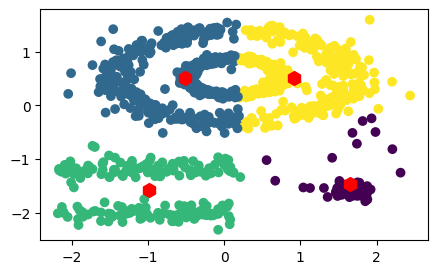

In [19]:
plt.figure(figsize=(5,3))

plt.scatter(scaled_df['x'],scaled_df['y'], c=ms_kmeans.labels_);
plt.scatter(ms_kmeans.cluster_centers_[:,0],ms_kmeans.cluster_centers_[:,1], c='r', marker='h', s=100);

l’argument `c=` dans `plt.scatter` permet de colorer les points dans le graphe.
Premièrement `c=` est utilisé pour colorer les point selon les labels des clusters obtenus. 
Dans la deuxième utilisation `c='r'` colore les points en rouge.

## Qualité du Clustering: Inertie `intragroupes`
L’inertie mesure la distance totale au carré entre les points et les centroïdes de leurs clusyers.   
Nous cherchons évidemment que cette distance soit relativement petite pour une leilleure similarité entre les point du même cluster.    
Pour déterminer un nombre optimal de clusters, il est simplement possible de varier **k** sur une plage de valeurs, et à chaque fois, de mesurer l’inertie globale.

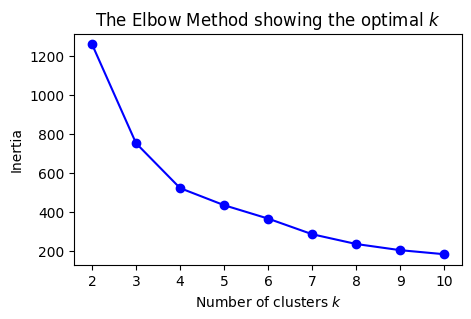

In [20]:
wss = []
for i in range(2,11):
    fitx = KMeans(n_clusters=i, init='random', n_init=5, random_state=109).fit(scaled_df)
    wss.append(fitx.inertia_)

plt.figure(figsize=(5,3))
plt.plot(range(2,11), wss, 'bo-')
plt.xlabel('Number of clusters $k$')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal $k$')
plt.show()

Cherchons le niveau à partir duquel l'inertie intra cesse de diminuer significativement `(c.-à-d. le coude de la courbe)`.  
Il semble que 4 serait un bon nombre de clusters, car au-delà de 4 clusters ne semble plus rentable.

## 3b. Agglomerative Clustering


#### Code (via `scipy`):

Ward est un critère de fusion de clusters qui cherche à minimiser les distances intra-clusters (à l'intérieur des clusters), il fusionne donc les deux clusters qui nuiront le moins à cet objectif.        
La fonction `cluster.hierarchy()` de regroupement hiérarchique de `scipy` met en œuvre la méthode de Ward.

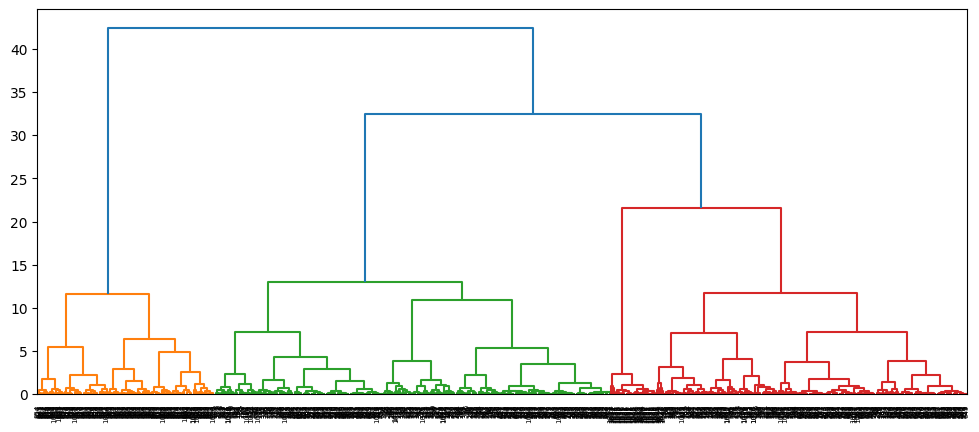

In [21]:
import scipy.cluster.hierarchy as hac
from scipy.spatial.distance import pdist

plt.figure(figsize=(12,5))
dist_mat = pdist(scaled_df, metric="euclidean")
ward_data = hac.ward(dist_mat)
hac.dendrogram(ward_data);
plt.show()

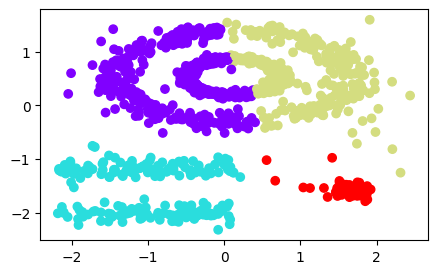

In [22]:
from sklearn.cluster import AgglomerativeClustering

Agglo_Clust = AgglomerativeClustering(n_clusters = 4).fit(scaled_df)

plt.figure(figsize=(5,3))
plt.scatter(scaled_df['x'], scaled_df['y'], c = Agglo_Clust.labels_, cmap ='rainbow')

# DBSCAN Clustering

DBSCAN (density-based spatial clustering of applications with noise) est un algorithme de clustering de données. Il s'agit d'un algorithme fondé sur la densité dans la mesure qui s’appuie sur la densité estimée des clusters pour effectuer le partitionnement.

### Code (via `sklearn`):
Consultez la documentation, [sklearn.cluster.DBSCAN()](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)

L'algorithme DBSCAN utilise 2 paramètres : 
- Une distance $\epsilon$  
- le nombre minimum de points $MinPts$ devant se trouver dans un rayon $\epsilon$  pour que ces points soient considérés comme un cluster. 

Les paramètres d'entrées sont donc une estimation de la densité de points des clusters.  
L'idée de base de l'algorithme est ensuite, pour un point donné, de récupérer son $\epsilon$-voisinage et de vérifier qu'il contient bien $MinPts$ points ou plus. Ce point est alors considéré comme faisant partie d'un cluster.   
On parcourt ensuite l'$\epsilon$-voisinage de proche en proche afin de trouver l'ensemble des points du cluster.

<center>
<img src="DBSCAN-Illustration.png" width="300">
</center>

- Les points du voisinage A sont le départ de construction du cluster.   
- Les points B et C sont atteignables depuis A et appartiennent donc au même cluster.   
- Le point N est une donnée aberrante puisque son $\epsilon$-voisinage ne contient pas MinPts points ou plus.

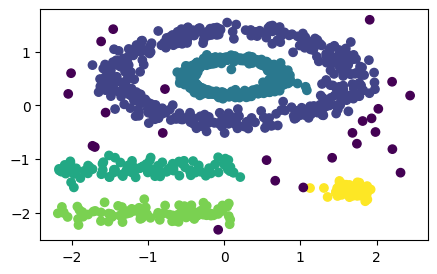

In [23]:
from sklearn.cluster import DBSCAN
plt.figure(figsize=(5,3))
fitted_dbscan = DBSCAN(eps=0.2).fit(scaled_df)
plt.scatter(scaled_df['x'],scaled_df['y'], c=fitted_dbscan.labels_)

In [24]:
#Les labels des clusters obtenus 
pd.Series(fitted_dbscan.labels_).unique()

array([ 0,  1,  2,  3,  4, -1])

Remarque : Les points en violet foncés `(fitted_dbscan.labels_=-1)` ne sont groupés avec aucun cluster (points abérants).  

**Notez bien qu'il n’existe pas de moyen automatisé pour rechercher le paramètre $\epsilon$ optimal.**

## Caractéristiques de DBSCAN
- Peut segmenter les données à distribution non linéaires et à forme aléatoire
- Il n’est pas nécessaire de préciser le nombre de clusters (c-à-d. k)
- Robuste aux valeurs aberrantes
- Très sensible aux paramètres ($\epsilon$ et $𝑀𝑖𝑛𝑃𝑡𝑠$)
- Ne garantit pas une segmentation de toutes les données (Données abérantes)

# <font color='red'>Travail à faire</font>

Appliquer les méthodes de clustering abordées dans ce lab sur le jeu de données __USArrests__

Le jeu de données __USArrests__ contient des statistiques sur les arrestations par 100 000 résidents pour agressions, meurtres et viols dans chacun des 50 États américains en 1973.
Il comprend également le pourcentage de la population dans les zones urbaines.